In [88]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io

In [232]:
lambda_=0.01
radius=10
sigma=0.1
C0=0.8
B=2e+6

r0=[radius,radius]/np.sqrt(2)
r0

array([7.07106781, 7.07106781])

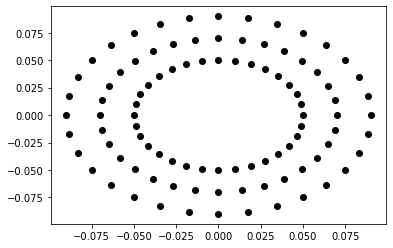

In [233]:
p=np.zeros([96,2])
for j,r in enumerate([0.05,0.07,0.09]):
    for i in range(32):
        alpha_i=i/32*np.pi*2
        p[i+j*32]=r*np.array([np.cos(alpha_i),np.sin(alpha_i)])

plt.plot(p[:,0],p[:,1],'ko')
plt.show()

In [ ]:
A = np.exp(-1j * 2 * np.pi * d/wavelen * np.kron(np.arange(M), np.sin(thetas)).reshape((M, D)))
S = 2 * np.exp(1j * (np.kron(w, np.arange(N)).reshape((D, N))))

In [234]:
w=np.exp(-1j*2*np.pi*np.dot(p,r0)/(radius*lambda_))
w.shape

(96,)

In [235]:
N=10000
thetas=np.linspace(0,2*np.pi,N)
r=radius*np.array([np.cos(thetas),np.sin(thetas)])
r.shape

(2, 10000)

In [236]:
b_gain=abs(w@np.exp(1j*2*np.pi*np.dot(p,r)/(radius*lambda_)))
print(b_gain)

[11.89750589 11.54144654 11.18319698 ... 12.601918   12.25109074
 11.89750589]


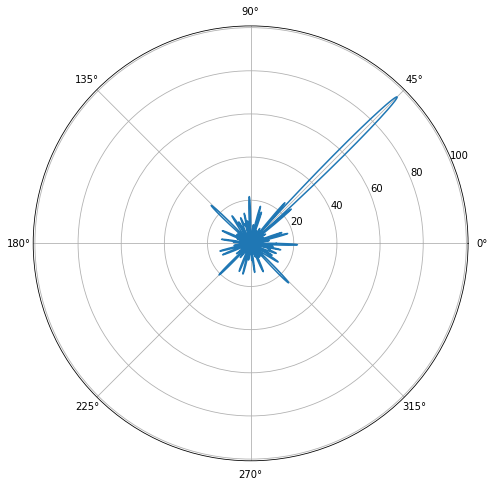

In [237]:
plt.figure(figsize=(10,8))
plt.polar()
plt.plot(np.arange(N)/N*2*np.pi,b_gain)
plt.show()

In [238]:
data=io.loadmat('data.mat')

In [249]:
directions=data['directions']
xyz=data['xyz']
src=data['src_model']
directions

array([[  0.5,  88.3, 185.1, 233. , 262.7],
       [  0.5,  88.3, 184.7, 233.6, 262.7],
       [  0.5,  88.1, 185.1, 233.8, 262.7],
       [  0.5,  87.9, 185.5, 232.4, 262.1],
       [  0.5,  88.4, 184.8, 234.1, 263.1],
       [  0.5,  88.2, 184.6, 234.2, 262.6],
       [  0.5,  88.3, 185. , 233.1, 262.8],
       [  0.5,  88.2, 185.1, 233. , 263. ],
       [  0.5,  88.2, 184.8, 233.2, 262.7],
       [  0.5,  88.2, 185.7, 232.7, 262.5]])

In [250]:
lambda_ = 0.336845458426966
sigma = 0.1
C0 = 0.8
B = 2e6 
N=src.shape[0]
r=src[:,0:2].T
r.shape

(2, 121)

In [251]:
R_user = np.zeros(directions.shape+(121,))
R_user.shape

(10, 5, 121)

In [252]:
for i in range(directions.shape[0]):
    for j in range(directions.shape[1]):
        angle=directions[i,j]/360*2*np.pi
        r0=[np.cos(angle), np.sin(angle)]
        w=np.exp(-1j*2*np.pi*np.dot(xyz,r0)/lambda_)
        b_gain=abs(w@np.exp(1j*2*np.pi*np.dot(xyz,r)/(lambda_)))
        for k in range(N):
            R_user[i,j,k]=B*np.log2(1+b_gain[i]/sigma*C0)

R_aver=np.mean(R_user)/N
R_aver

1798.9962578478446

In [244]:
N=10000
thetas=np.linspace(0,2*np.pi,N)
r=np.array([np.cos(thetas),np.sin(thetas)])

In [245]:
gains=[]
for i in range(directions.shape[0]):
    for j in range(directions.shape[1]):
        angle=directions[i,j]/360*2*np.pi
        print(angle)
        r0=[np.cos(angle), np.sin(angle)]
        print(r0)
        w=np.exp(-1j*2*np.pi*np.dot(xyz,r0)/lambda_)
        print(w)
        b_gain=abs(w@np.exp(1j*2*np.pi*np.dot(xyz,r)/(lambda_)))
        print(b_gain)
        gains.append(b_gain)
        break
    break

0.008726646259971648
[0.9999619230641713, 0.008726535498373935]
[ 0.99999997+2.39244441e-04j -0.22885786+9.73459851e-01j
  0.99849719-5.48029703e-02j -0.30357852-9.52806423e-01j
  0.99999997-2.39244441e-04j -0.22885786-9.73459851e-01j
  0.99849719+5.48029703e-02j -0.30357852+9.52806423e-01j
 -0.9996275 +2.72922083e-02j -0.99962094+2.75313628e-02j
 -0.9996275 -2.72922083e-02j -0.99962094-2.75313628e-02j
  0.80579617-5.92192992e-01j  0.80903106+5.87765897e-01j
  0.99998497+5.48301649e-03j]
[14.9924552  14.9935025  14.99447161 ... 14.9901261  14.99132973
 14.9924552 ]


In [246]:
directions[0,0]

0.5

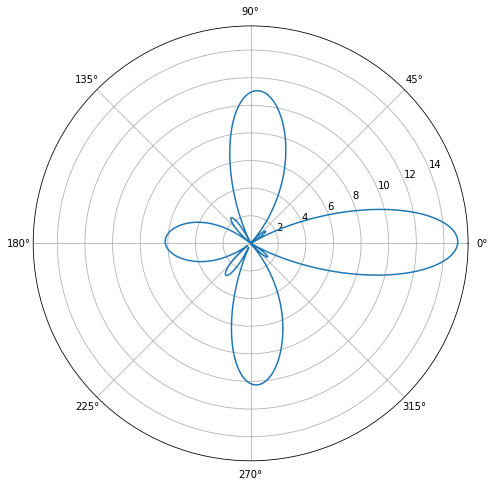

In [247]:
plt.figure(figsize=(10,8))
plt.polar()
plt.plot(np.arange(N)/N*2*np.pi,gains[0])
plt.show()